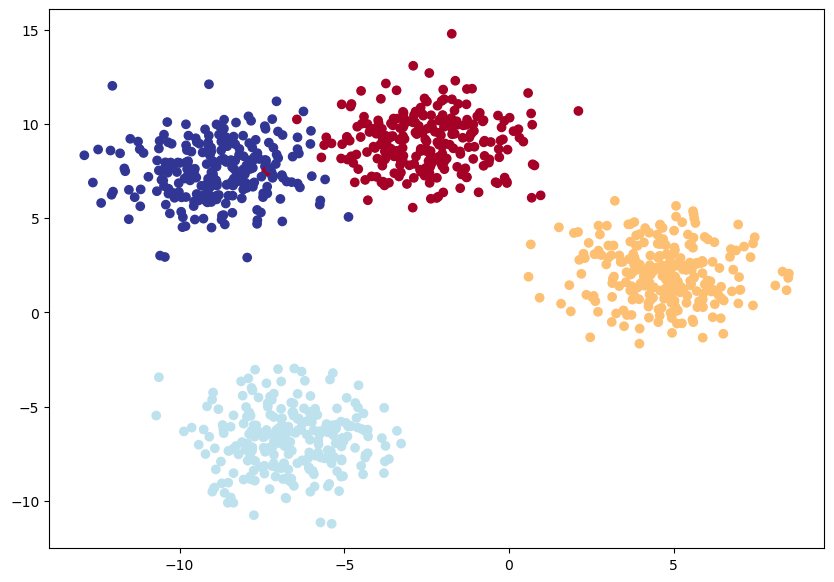

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#crate multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, #shake up
                            random_state=RANDOM_SEED)

#turning into tensors
X_blob = torch.FloatTensor(X_blob)
y_blob = torch.LongTensor(y_blob) # this needs to be long for Cross entrpy loss to prevent an error

#splot
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap = plt.cm.RdYlBu)

In [2]:
#building out multiclass classification

device = 'cuda' if torch.cuda.is_available() else 'cuda'
device

'cuda'

In [3]:
#building a multiclass classification model

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes mutli class - classification model.

        Args:
        input_features (int): Number of input features to the model
        output_features (int): numer of poutu t deatures (number of output classes)
        hidden units (int): number of hidden units between layers,,  deault 8

        returns : 
        Examples: 
        """
        super().__init__() 
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), #test without relu to check if it can work without non linear functions
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)
    
    #create an insace of bloblmodels and sent it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [4]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [5]:
#crate a loss and optimzer
loss_fn = nn.CrossEntropyLoss()

#create an optimizer for multi
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [6]:
#geting prediction porabblites fo rmulticlass pytorch models
#lets get some raw outputs of our model
next(model_4.parameters()).device

device(type='cuda', index=0)

In [7]:
X_blob_train.device

device(type='cpu')

In [8]:
#getting pred prob for a multiclass pytorch model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10] #these RE THE LOGITS

tensor([[ 0.5057, -0.5211, -0.0528, -0.1064],
        [ 0.0682, -0.8506, -0.2276, -0.7435],
        [-0.9868, -0.4696, -0.5864, -0.9686],
        [ 0.1801, -0.1874, -0.0989,  0.2558],
        [ 0.7795, -1.1935, -0.1502, -0.7162],
        [ 0.0585, -0.9707, -0.2454, -0.9488],
        [-1.0558, -0.3781, -0.7118, -1.2076],
        [ 0.5094, -1.0598, -0.1727, -0.6690],
        [-0.9817, -0.6287, -0.4674, -0.7653],
        [ 0.6009, -1.0915, -0.1637, -0.6652]], device='cuda:0')

In [9]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [10]:
#in order ot evaluate and train and test our models, we need to vconvert ouot models outpts (ogits) to proedciotn probs then pred labesl
#logs -> pred probs -> pred labels

In [11]:
#therefore
#to convert our logits outputs ot prediction probablites
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.5057, -0.5211, -0.0528, -0.1064],
        [ 0.0682, -0.8506, -0.2276, -0.7435],
        [-0.9868, -0.4696, -0.5864, -0.9686],
        [ 0.1801, -0.1874, -0.0989,  0.2558],
        [ 0.7795, -1.1935, -0.1502, -0.7162]], device='cuda:0')
tensor([[0.4045, 0.1449, 0.2314, 0.2193],
        [0.3866, 0.1542, 0.2876, 0.1717],
        [0.1928, 0.3233, 0.2877, 0.1963],
        [0.2835, 0.1963, 0.2145, 0.3058],
        [0.5689, 0.0791, 0.2245, 0.1275]], device='cuda:0')


In [12]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [13]:
torch.argmax(y_pred_probs[0])

tensor(0, device='cuda:0')

In [14]:
#converting our models's preds probs into pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 0, 1, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1,
        1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0,
        3, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3, 3, 0, 1, 1, 0, 0, 0, 3, 2,
        2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2,
        1, 2, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0,
        3, 0, 2, 0, 0, 3, 2, 0], device='cuda:0')

In [15]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
y_blob_train.dtype


torch.int64

In [18]:
#create a traiing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
#device agnostism
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop thorugh data
for epoch in range(epochs):
    #training
    model_4.eval()
    #frwoward pass
    y_logits = model_4(X_blob_train).squeeze() #dont have to squeeze for multiclass classificaiton
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    #calc the loss
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_score(y_blob_train.cpu(), y_pred.cpu())
    # acc = torchmetrics.Accuracy()!!!!!

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test).squeeze() #dont ahve to squeeze for multi class classiificaion
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_blob_test)
        test_acc = accuracy_score(y_blob_test.cpu(),test_pred.cpu())
        # acc = torchmetrics.Accuracy()!!!!!
        

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | train_acc: {acc*100:.4f} | test_loss: {test_loss:.4f} | test_acc: {test_acc*100:.4f}")




Epoch: 0 | Loss: 1.3862 | train_acc: 36.3750 | test_loss: 1.2692 | test_acc: 47.0000
Epoch: 10 | Loss: 0.5233 | train_acc: 93.8750 | test_loss: 0.4360 | test_acc: 96.5000
Epoch: 20 | Loss: 0.1569 | train_acc: 98.6250 | test_loss: 0.1343 | test_acc: 99.0000
Epoch: 30 | Loss: 0.0837 | train_acc: 99.0000 | test_loss: 0.0729 | test_acc: 99.0000


Epoch: 40 | Loss: 0.0602 | train_acc: 99.0000 | test_loss: 0.0516 | test_acc: 99.0000
Epoch: 50 | Loss: 0.0492 | train_acc: 99.0000 | test_loss: 0.0411 | test_acc: 99.0000
Epoch: 60 | Loss: 0.0429 | train_acc: 99.0000 | test_loss: 0.0349 | test_acc: 99.0000
Epoch: 70 | Loss: 0.0388 | train_acc: 99.2500 | test_loss: 0.0308 | test_acc: 99.5000
Epoch: 80 | Loss: 0.0360 | train_acc: 99.2500 | test_loss: 0.0279 | test_acc: 99.5000
Epoch: 90 | Loss: 0.0340 | train_acc: 99.2500 | test_loss: 0.0258 | test_acc: 99.5000


In [19]:
# to fix this 
#for cross entropy loss u wanna use torch.Long datatpye!
#making adn evaluating preditions with ap ytorch multi-class model

model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_pred_prob = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_prob, dim=1)
y_pred_labels



tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [20]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

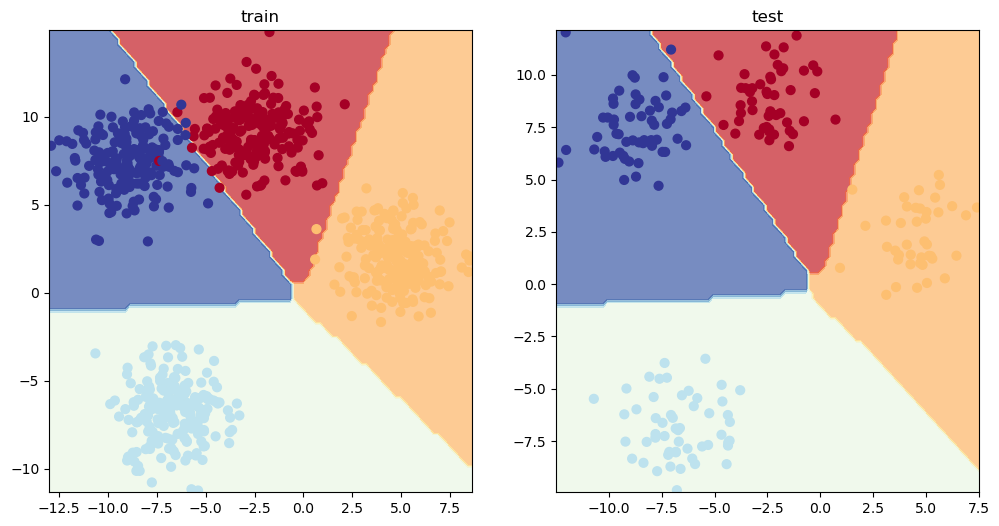

In [21]:
from helper_functions import plot_decision_boundary, plot_predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [22]:
#will this model work without non linear functions???
#YESS TRY WITHOUT RELU LAYER
#BECAUSE ITS DATA IS LINEARLY SEPERAble

## A few more classification metrics ( to evaluate)

* Accuracy -> balanced datasets-> torchmetrics.Accuracy() /sklearn but need dto more to cpu
* confusion matrix -> torchmetrics.ConfusionMatrix()
* k-fold cross validaiton ???
* precision -> imbalanced datset -> torchmetrics.Precision() -> less false positves
* recall -> imbalanced datset -> "similar -> less false negatives

* look into precision recall tradeoff 
* f-1 score -> "
* classificatin report-> "


In [31]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

#calc accuracy

print(torchmetric_accuracy(y_pred_labels, y_blob_test))

tensor(0.9950, device='cuda:0')


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_labels.cpu(), y_blob_test.cpu()))

0.995


In [24]:
torchmetric_accuracy.device

device(type='cuda', index=0)